In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2020-01-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2020_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-01-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,12675,해운대구,5250,70.71%,"9,425"
1,2020-01-09,간장,오복왕표 0.9ℓ 1병,5850,해운대구,7250,해운대구,1400,23.93%,"6,467"
2,2020-01-09,갈치,60cm정도 500g 1마리(냉동),7500,해운대구,18468,해운대구,10968,146.24%,"12,656"
3,2020-01-09,고등어,30㎝정도 500g 1마리,4069,해운대구,5564,해운대구,1495,36.74%,"4,873"
4,2020-01-09,달걀,오경슈퍼란60g정도 10개,2690,해운대구,2980,해운대구,290,10.78%,"2,790"
5,2020-01-09,닭고기,육계 1.0㎏,4190,해운대구,8112,해운대구,3922,93.6%,"5,827"
6,2020-01-09,대파,1.0㎏,2910,해운대구,3490,해운대구,580,19.93%,"3,122"
7,2020-01-09,돼지고기,삼겹살 500g,7900,해운대구,12450,해운대구,4550,57.59%,"9,417"
8,2020-01-09,두부,500g 판두부(국산포장두부 420g) 1모,4531,해운대구,4879,해운대구,348,7.68%,"4,647"
9,2020-01-09,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2020-04-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2020_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-04-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5175,해운대구,12675,해운대구,7500,144.93%,"8,425"
1,2020-04-09,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2020-04-09,갈치,60cm정도 500g 1마리(냉동),7085,해운대구,16375,해운대구,9290,131.12%,"12,714"
3,2020-04-09,고등어,30㎝정도 500g 1마리,4709,해운대구,8846,해운대구,4137,87.85%,"6,441"
4,2020-04-09,달걀,오경슈퍼란60g정도 10개,2800,해운대구,2990,해운대구,190,6.79%,"2,923"
5,2020-04-09,닭고기,육계 1.0㎏,4680,해운대구,9362,해운대구,4682,100.04%,"7,082"
6,2020-04-09,대파,1.0㎏,1522,해운대구,2490,해운대구,968,63.6%,"1,904"
7,2020-04-09,돼지고기,삼겹살 500g,7250,해운대구,12450,해운대구,5200,71.72%,"9,533"
8,2020-04-09,두부,500g 판두부(국산포장두부 420g) 1모,4531,해운대구,4879,해운대구,348,7.68%,"4,647"
9,2020-04-09,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2020-07-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2020_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-07-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,해운대구,8175,해운대구,1500,22.47%,"7,425"
1,2020-07-09,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2020-07-09,갈치,60cm정도 500g 1마리(냉동),7085,해운대구,15090,해운대구,8005,112.99%,"11,875"
3,2020-07-09,고등어,30㎝정도 500g 1마리,4729,해운대구,6484,해운대구,1755,37.11%,"5,707"
4,2020-07-09,달걀,오경슈퍼란60g정도 10개,2350,해운대구,2990,해운대구,640,27.23%,"2,773"
5,2020-07-09,닭고기,육계 1.0㎏,4400,해운대구,7487,해운대구,3087,70.16%,"5,622"
6,2020-07-09,대파,1.0㎏,2420,해운대구,3990,해운대구,1570,64.88%,"3,129"
7,2020-07-09,돼지고기,삼겹살 500g,10400,해운대구,14950,해운대구,4550,43.75%,"12,083"
8,2020-07-09,두부,500g 판두부(국산포장두부 420g) 1모,3220,해운대구,4879,해운대구,1659,51.52%,"4,210"
9,2020-07-09,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2020-10-15"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2020_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2020-10-15,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,14850,해운대구,7425,100.0%,"10,150"
1,2020-10-15,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2020-10-15,갈치,60cm정도 500g 1마리(냉동),11014,해운대구,12000,해운대구,986,8.95%,"11,563"
3,2020-10-15,고등어,30㎝정도 500g 1마리,2683,해운대구,4861,해운대구,2178,81.18%,"3,637"
4,2020-10-15,달걀,오경슈퍼란60g정도 10개,2780,해운대구,2990,해운대구,210,7.55%,"2,917"
5,2020-10-15,닭고기,육계 1.0㎏,4300,해운대구,9362,해운대구,5062,117.72%,"7,033"
6,2020-10-15,대파,1.0㎏,4108,해운대구,5490,해운대구,1382,33.64%,"4,724"
7,2020-10-15,돼지고기,삼겹살 500g,10900,해운대구,16950,해운대구,6050,55.5%,"13,083"
8,2020-10-15,두부,500g 판두부(국산포장두부 420g) 1모,3206,해운대구,4879,해운대구,1673,52.18%,"4,205"
9,2020-10-15,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676


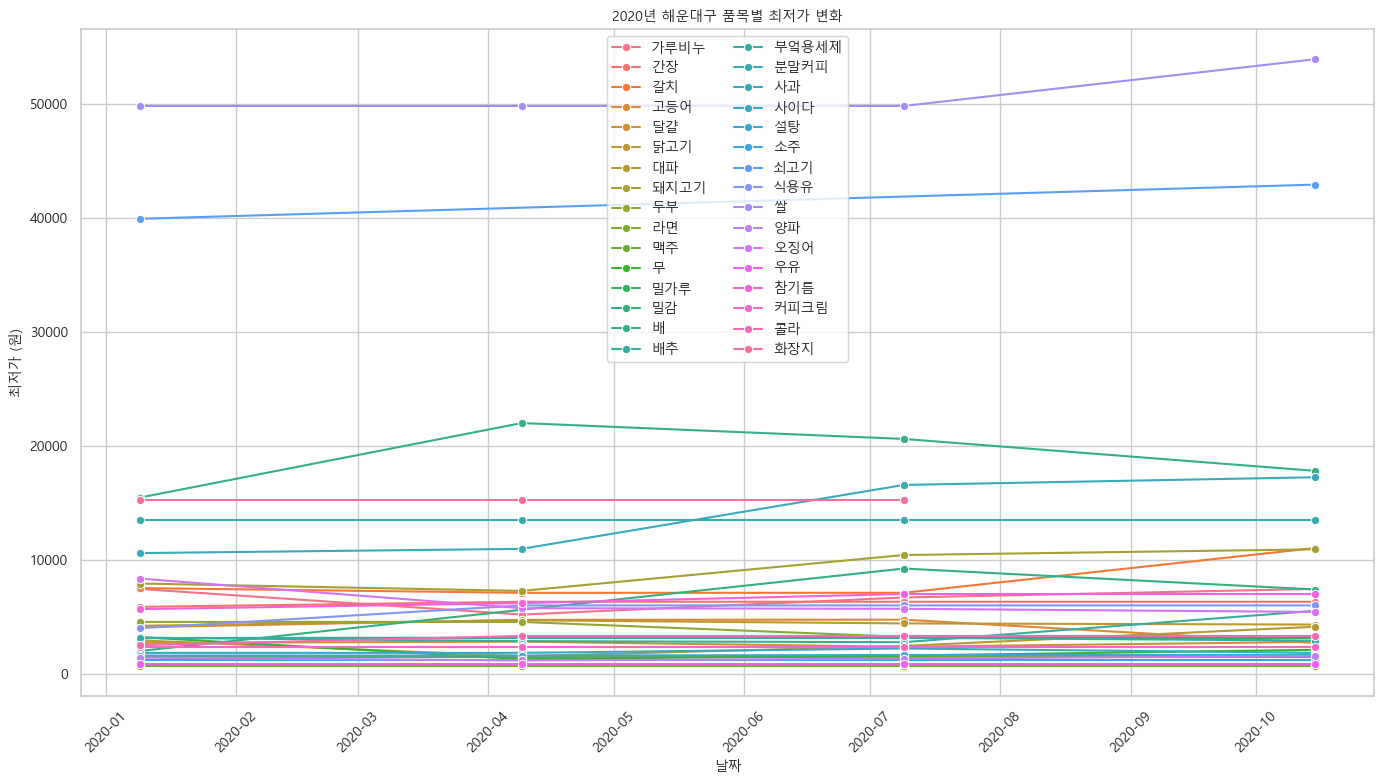

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2020_1q.csv")
q2 = pd.read_csv("해운대구2020_2q.csv")
q3 = pd.read_csv("해운대구2020_3q.csv")
q4 = pd.read_csv("해운대구2020_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2020년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2020_min.csv", index=False, encoding="utf-8-sig")

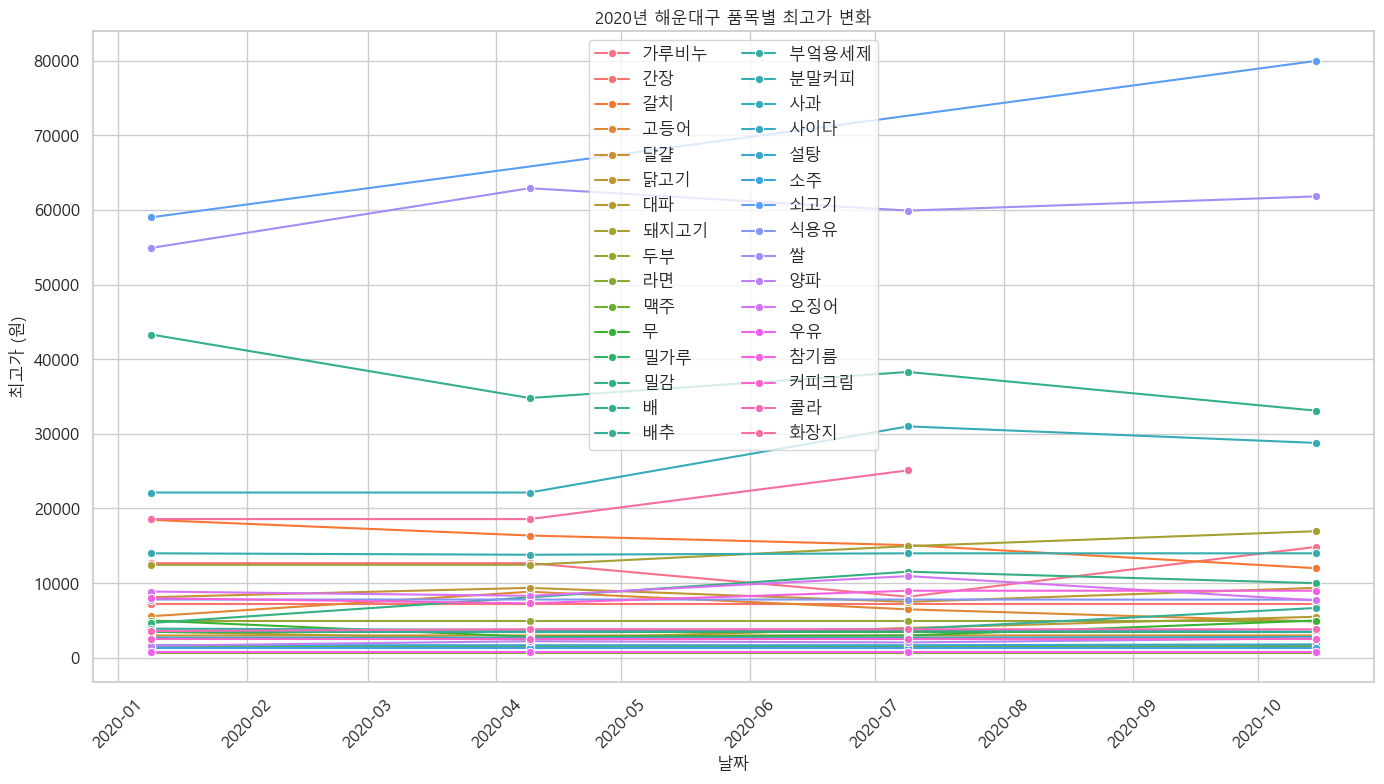

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2020_1q.csv")
q2 = pd.read_csv("해운대구2020_2q.csv")
q3 = pd.read_csv("해운대구2020_3q.csv")
q4 = pd.read_csv("해운대구2020_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2020년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2020_max.csv", index=False, encoding="utf-8-sig")